# Introduction and Background

### What is the question you hope you can answer?

What are the levels of concentration of chemical ocean pollutants?

### Why is the question important to you?

I love the ocean and I think marine life is fascinating. However, human activity has been polluting our oceans, and this has been growing into a severe issue. I think people are aware that our oceans are polluted, but I want to see just how severe the issue is. I think it's especially important to understand what harmful chemicals are in our oceans, because we can see physical trash but we can't see chemicals that are equally as harmful.

### What are you hoping to achieve with the project?

I hope that we can make visualizations that help people get a better sense of the composition of our oceans. I also hope that this leads to discoveries of anything that is especially alarming, and could raise awareness of the harm we are doing to our planet. I'm personally interested in the application of GIS and data science to environmental issues, which is what I hope to find a career in, so this would be a fun and interesting project for me.

# Description of the Data

### Where did you get your data?

I got my data from waterqualitydata.us. I got to that site from the NOAA's Office for Coastal Management. 

### What data is found in your data set?

The Water Quality Portal has data for many water sources, including the ocean. My search query included these specifications:

- Site type: ocean
- Sample media: water
- Data range: 1/1/2020 - 11/15/2024
- Characteristic group: Organics BDEs, Organics Other, Organics PCBs, Organics Pesticides, Organics PFAs
- Data profiles: Sample results (physical/chemical metadata)
- File format: comma-separated

### Are there any ethical concerns with using the data or how the data was obtained?

There are no ethical concerns. The data was obtained from lab testing, so there isn't any bias in the data. It is straight from samples and testing, there are no assumptions in the data. Agencies like the United States Geological Survey (USGS) and the Environmental Protection Agency (EPA) contributed to this data.  

### Is there a public location where the data is freely available? If so where? If not why?

The data is available on waterqualitydata.us. The site allows users to adjust the search query to customize the data in the csv. 

# Initial Exploratory Data Analysis


Descriptive statistics for the data set, counts of the variables, value counts (frequency tables) for each categorical variable of interest.
Plots that help a reader understand your data.
Initial analysis to answer initial data questions.

In [14]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

In [15]:
DFproject = pd.read_csv('resultphyschem.csv')
show(DFproject)

In [16]:
DFproject.keys()

Index(['OrganizationIdentifier', 'OrganizationFormalName',
       'ActivityIdentifier', 'ActivityTypeCode', 'ActivityMediaName',
       'ActivityMediaSubdivisionName', 'ActivityStartDate',
       'ActivityStartTime/Time', 'ActivityStartTime/TimeZoneCode',
       'ActivityEndDate', 'ActivityEndTime/Time',
       'ActivityEndTime/TimeZoneCode', 'ActivityRelativeDepthName',
       'ActivityDepthHeightMeasure/MeasureValue',
       'ActivityDepthHeightMeasure/MeasureUnitCode',
       'ActivityDepthAltitudeReferencePointText',
       'ActivityTopDepthHeightMeasure/MeasureValue',
       'ActivityTopDepthHeightMeasure/MeasureUnitCode',
       'ActivityBottomDepthHeightMeasure/MeasureValue',
       'ActivityBottomDepthHeightMeasure/MeasureUnitCode', 'ProjectIdentifier',
       'ProjectName', 'ActivityConductingOrganizationText',
       'MonitoringLocationIdentifier', 'MonitoringLocationName',
       'ActivityCommentText', 'SampleAquifer', 'HydrologicCondition',
       'HydrologicEvent', 'Activi

The site below explains what each columns represents. 

Table 7. "Sample Results (Physical/Chemical)" Result Retrieval Metadata

https://www.waterqualitydata.us/portal_userguide/

In [18]:
columns = ['ActivityStartDate','ActivityEndDate','ActivityDepthHeightMeasure/MeasureValue','ActivityDepthHeightMeasure/MeasureUnitCode','ActivityConductingOrganizationText','MonitoringLocationName','ActivityLocation/LatitudeMeasure','ActivityLocation/LongitudeMeasure','CharacteristicName','ResultMeasureValue','ResultMeasure/MeasureUnitCode']
newDF = DFproject[columns]
show(newDF)

In [19]:
newDF.keys()

Index(['ActivityStartDate', 'ActivityEndDate',
       'ActivityDepthHeightMeasure/MeasureValue',
       'ActivityDepthHeightMeasure/MeasureUnitCode',
       'ActivityConductingOrganizationText', 'MonitoringLocationName',
       'ActivityLocation/LatitudeMeasure', 'ActivityLocation/LongitudeMeasure',
       'CharacteristicName', 'ResultMeasureValue',
       'ResultMeasure/MeasureUnitCode'],
      dtype='object')

### Definition of all variables (or explanation for why you are not considering some variables)

ActivityStartDate: The date when collection started

ActivityEndDate: The date when collection was completed

ActivityDepthHeightMeasure/MeasureValue: A measurement of the vertical location (measured from a reference point) where the sample was collected

ActivityDepthHeightMeasure/MeasureUnitCode: The units for the Depth Height Measurement

ActivityConductingOrganizationText: Name of the organization that collected and analyzed the samples

MonitoringLocationName: Name of the location where the sample was collected

ActivityLocation/LatitudeMeasure: Latitude of where the sample was collected

ActivityLocation/LongitudeMeasure: Longitude of where the sample was collected

CharacteristicName: The substance that is being analyzed

ResultMeasureValue: The measure of the substance that was analyzed

ResultMeasure/MeasureUnitCode: The units for ResultMeasureValue

- I didn't include many of the variables because there were mostly NaNs and there were very few actual observations under those columns, meaning that there wasn't enough to do any meaningful analysis based on those columns

### Descriptive statistics for the data set, counts of the variables, value counts (frequency tables) for each categorical variable of interest.

In [22]:
newDF.shape

(5901, 11)

There are 5901 observations and 11 variables.

#### Before finding statistics for the dataset, I wanted to make sure that all the variables were the right data type.

In [25]:
newDF.dtypes

ActivityStartDate                              object
ActivityEndDate                                object
ActivityDepthHeightMeasure/MeasureValue       float64
ActivityDepthHeightMeasure/MeasureUnitCode     object
ActivityConductingOrganizationText             object
MonitoringLocationName                         object
ActivityLocation/LatitudeMeasure              float64
ActivityLocation/LongitudeMeasure             float64
CharacteristicName                             object
ResultMeasureValue                             object
ResultMeasure/MeasureUnitCode                  object
dtype: object

#### The only variable that needs to be converted is ResultMeasureValue. This should be a float, not an object. Below I tried converting the variable into a float, but ran into an error.

#### The error is saying that some observations under ResultMeasureValue are listed as N, and N cannot be converted into a float because it is not a number. Below I change these N's into zeros.

In [104]:
newDF['ResultMeasureValue'].replace('N','0',inplace=True)
newDF['ResultMeasureValue'] = newDF['ResultMeasureValue'].apply(lambda x: float(x))

/var/folders/3p/1bz4xmy96wj0vhl_qhqj52t80000gp/T/ipykernel_5431/4034872473.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/3p/1bz4xmy96wj0vhl_qhqj52t80000gp/T/ipykernel_5431/4034872473.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/3p/1bz4xmy96wj0vhl_qhqj52t80000gp/T/ipykernel_5431/4034872473.py:2: SettingWit

In [33]:
newDF['ResultMeasureValue'].replace('*Non-detect','0',inplace=True)
newDF['ResultMeasureValue'] = newDF['ResultMeasureValue'].apply(lambda x: float(x))

/var/folders/3p/1bz4xmy96wj0vhl_qhqj52t80000gp/T/ipykernel_5431/2917761927.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/3p/1bz4xmy96wj0vhl_qhqj52t80000gp/T/ipykernel_5431/2917761927.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
newDF.dtypes

ActivityStartDate                              object
ActivityEndDate                                object
ActivityDepthHeightMeasure/MeasureValue       float64
ActivityDepthHeightMeasure/MeasureUnitCode     object
ActivityConductingOrganizationText             object
MonitoringLocationName                         object
ActivityLocation/LatitudeMeasure              float64
ActivityLocation/LongitudeMeasure             float64
CharacteristicName                             object
ResultMeasureValue                            float64
ResultMeasure/MeasureUnitCode                  object
dtype: object

#### Before finding the stats of the numerical data, I need to convert everything into the same units of measurement.

In [37]:
list(newDF['ActivityDepthHeightMeasure/MeasureUnitCode'].value_counts().keys())

['m', 'ft']

#### The units for depth are listed in either meters or feet. I'm going to convert feet into meters.

In [39]:
newDF['ActivityDepthHeightMeasure/MeasureUnitCode'].value_counts()

ActivityDepthHeightMeasure/MeasureUnitCode
m     4053
ft     820
Name: count, dtype: int64

In [43]:
maskftconversion = (newDF['ActivityDepthHeightMeasure/MeasureUnitCode'] == 'ft')
DFftconversion = newDF[maskftconversion]
show(DFftconversion)

In [58]:
DFftconversion['ActivityDepthHeightMeasure/MeasureValue']=DFftconversion['ActivityDepthHeightMeasure/MeasureValue'].apply(lambda x: x * 0.3048)
DFftconversion

/var/folders/3p/1bz4xmy96wj0vhl_qhqj52t80000gp/T/ipykernel_5431/1500207143.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ActivityStartDate,ActivityEndDate,ActivityDepthHeightMeasure/MeasureValue,ActivityDepthHeightMeasure/MeasureUnitCode,ActivityConductingOrganizationText,MonitoringLocationName,ActivityLocation/LatitudeMeasure,ActivityLocation/LongitudeMeasure,CharacteristicName,ResultMeasureValue,ResultMeasure/MeasureUnitCode,depthft
2,2020-02-11,NaN,0.1524,ft,MISSISSIPPI DEPARTMENT OF ENVIRONMENTAL QUALITY,BAY ST LOUIS BEACH,30.300222,-89.332639,Organic carbon,4.00,mg/L,0.1524
14,2020-02-11,NaN,0.1524,ft,MISSISSIPPI DEPARTMENT OF ENVIRONMENTAL QUALITY,LONG BEACH,30.339944,-89.159722,Organic carbon,5.00,mg/L,0.1524
78,2020-02-11,NaN,0.1524,ft,MISSISSIPPI DEPARTMENT OF ENVIRONMENTAL QUALITY,WAVELAND BEACH,30.276139,-89.373611,Organic carbon,5.00,mg/L,0.1524
108,2020-09-08,NaN,0.4572,ft,CITY OF SANIBEL NATURAL RESOURCES DEPARTMENT,"Blind Pass 2 Outside, Gulf of Mexico, collecte...",26.482719,-82.183192,Organic carbon,5.94,mg/L,0.4572
137,2020-01-14,NaN,0.1524,ft,MISSISSIPPI DEPARTMENT OF ENVIRONMENTAL QUALITY,FRONT BEACH,30.406389,-88.833333,Organic carbon,6.00,mg/L,0.1524
...,...,...,...,...,...,...,...,...,...,...,...,...
5895,2024-05-14,NaN,0.1524,ft,MISSISSIPPI DEPARTMENT OF ENVIRONMENTAL QUALITY,PASCAGOULA BEACH WEST,30.342639,-88.535417,Organic carbon,2.19,mg/L,0.1524
5896,2024-04-15,NaN,0.1524,ft,MISSISSIPPI DEPARTMENT OF ENVIRONMENTAL QUALITY,WAVELAND BEACH,30.276139,-89.373611,Organic carbon,3.50,mg/L,0.1524
5897,2024-04-15,NaN,0.1524,ft,MISSISSIPPI DEPARTMENT OF ENVIRONMENTAL QUALITY,LONG BEACH,30.339944,-89.159722,Organic carbon,3.83,mg/L,0.1524
5898,2024-05-13,NaN,0.1524,ft,MISSISSIPPI DEPARTMENT OF ENVIRONMENTAL QUALITY,WAVELAND BEACH,30.276139,-89.373611,Organic carbon,2.59,mg/L,0.1524


In [60]:
maskmeters = (newDF['ActivityDepthHeightMeasure/MeasureUnitCode'] == 'm')
DFmeters = newDF[maskmeters]
show(DFmeters)

In [87]:
# Outer - Return all ids
DFconverted = pd.merge(DFftconversion, DFmeters, on='ActivityDepthHeightMeasure/MeasureUnitCode',how='outer')
show(DFconverted)

In [89]:
DFconverted['ActivityDepthHeightMeasure/MeasureUnitCode'].replace('ft','m',inplace=True)
show(DFconverted)

/var/folders/3p/1bz4xmy96wj0vhl_qhqj52t80000gp/T/ipykernel_5431/3991437519.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [95]:
DFconverted.keys()

Index(['ActivityStartDate_x', 'ActivityEndDate_x',
       'ActivityDepthHeightMeasure/MeasureValue_x',
       'ActivityDepthHeightMeasure/MeasureUnitCode',
       'ActivityConductingOrganizationText_x', 'MonitoringLocationName_x',
       'ActivityLocation/LatitudeMeasure_x',
       'ActivityLocation/LongitudeMeasure_x', 'CharacteristicName_x',
       'ResultMeasureValue_x', 'ResultMeasure/MeasureUnitCode_x', 'depthft',
       'ActivityStartDate_y', 'ActivityEndDate_y',
       'ActivityDepthHeightMeasure/MeasureValue_y',
       'ActivityConductingOrganizationText_y', 'MonitoringLocationName_y',
       'ActivityLocation/LatitudeMeasure_y',
       'ActivityLocation/LongitudeMeasure_y', 'CharacteristicName_y',
       'ResultMeasureValue_y', 'ResultMeasure/MeasureUnitCode_y'],
      dtype='object')

In [97]:
columnsconverted = ['ActivityStartDate_x', 'ActivityEndDate_x',
       'ActivityDepthHeightMeasure/MeasureValue_x',
       'ActivityDepthHeightMeasure/MeasureUnitCode',
       'ActivityConductingOrganizationText_x', 'MonitoringLocationName_x',
       'ActivityLocation/LatitudeMeasure_x',
       'ActivityLocation/LongitudeMeasure_x', 'CharacteristicName_x',
       'ResultMeasureValue_x', 'ResultMeasure/MeasureUnitCode_x']
DF2 = DFconverted[columnsconverted]
show(DF2)

#### Now the depth values are all in meters.

In [99]:
DF2.describe()

,ActivityDepthHeightMeasure/MeasureValue_x,ActivityLocation/LatitudeMeasure_x,ActivityLocation/LongitudeMeasure_x,ResultMeasureValue_x
count,820.000000,820.000000,820.000000,817.000000
mean,0.169067,30.161926,-88.712493,2.633550
std,0.070121,0.814614,1.494360,1.902763
min,0.152400,26.482719,-89.423300,0.550000
25%,0.152400,30.303500,-89.254694,1.790000
50%,0.152400,30.342639,-89.053917,2.180000
75%,0.152400,30.388222,-88.876361,2.830000
max,0.499872,30.406389,-82.183192,39.100000


#### The minimum depth that a sample was collected was at 0.1524 meters below the surface. The maximum depth that a sample was collected was at 0.499872 meters below the surface. 

#### These stats also show that the latitude ranges from 26.48 to 30.41, and the longitude ranges from -89.42 to -82.18. With these coordinates, it seems that these samples are taken within the Gulf of Mexico.

In [106]:
DF2.keys()

Index(['ActivityStartDate_x', 'ActivityEndDate_x',
       'ActivityDepthHeightMeasure/MeasureValue_x',
       'ActivityDepthHeightMeasure/MeasureUnitCode',
       'ActivityConductingOrganizationText_x', 'MonitoringLocationName_x',
       'ActivityLocation/LatitudeMeasure_x',
       'ActivityLocation/LongitudeMeasure_x', 'CharacteristicName_x',
       'ResultMeasureValue_x', 'ResultMeasure/MeasureUnitCode_x'],
      dtype='object')

In [109]:
DF2['ActivityConductingOrganizationText_x'].value_counts()

ActivityConductingOrganizationText_x
MISSISSIPPI DEPARTMENT OF ENVIRONMENTAL QUALITY    776
CITY OF SANIBEL NATURAL RESOURCES DEPARTMENT        38
JIM STIDHAM AND ASSOCIATES, INC.                     6
Name: count, dtype: int64

#### The Mississippi Department of Environmental Quality collected and analyzed the most samples. 

In [112]:
DF2['MonitoringLocationName_x'].value_counts()

MonitoringLocationName_x
BUCCANEER STATE PARK BEACH                                   38
LAKESHORE BEACH                                              38
WAVELAND BEACH                                               38
Blind Pass 2 Outside, Gulf of Mexico, collected off jetty    38
GULFPORT WEST BEACH                                          38
GULFPORT CENTRAL BEACH                                       38
PASS CHRISTIAN EAST BEACH                                    37
PASS CHRISTIAN WEST BEACH                                    37
PASS CHRISTIAN CENTRAL BEACH                                 37
GULFPORT HARBOR BEACH                                        37
LONG BEACH                                                   37
BAY ST LOUIS BEACH                                           37
BILOXI EAST BEACH                                            37
PASCAGOULA BEACH WEST                                        37
COURTHOUSE ROAD BEACH                                        37
FRONT BEACH    

#### St. Joseph Bay had 6 samples collected, but each were at different spots within the bay. All of these sites are located along the Gulf of Mexico

In [115]:
DF2['CharacteristicName_x'].value_counts()

CharacteristicName_x
Organic carbon    820
Name: count, dtype: int64

#### In all the samples, ignoring NaNs, the concentration of carbon was tested. 

In [119]:
DF2['ResultMeasure/MeasureUnitCode_x'].value_counts()

ResultMeasure/MeasureUnitCode_x
mg/L    817
Name: count, dtype: int64

#### The units for the measurement of carbon in water is  mg of carbon per liter of water

### Plots that help a reader understand your data.

In [124]:
show(DF2)

In [244]:
DF2.keys()

Index(['ActivityStartDate_x', 'ActivityEndDate_x',
       'ActivityDepthHeightMeasure/MeasureValue_x',
       'ActivityDepthHeightMeasure/MeasureUnitCode',
       'ActivityConductingOrganizationText_x', 'MonitoringLocationName_x',
       'ActivityLocation/LatitudeMeasure_x',
       'ActivityLocation/LongitudeMeasure_x', 'CharacteristicName_x',
       'ResultMeasureValue_x', 'ResultMeasure/MeasureUnitCode_x'],
      dtype='object')

#### I chose these columns because I wanted to know the carbon concentratons at each location and compare them to one another.

In [305]:
plotscolumns = ['MonitoringLocationName_x','ResultMeasureValue_x','ActivityLocation/LongitudeMeasure_x']
DFplots = DF2[plotscolumns]
show(DFplots)

#### Because multiple samples were taken at each site, I grouped by the location and took the average of the carbon results. I put this in a new dataframe to use for visualizatons

In [325]:
DFplots = DFplots.groupby(by=['MonitoringLocationName_x']).mean()
DFplots = DFplots.reset_index().rename(columns={"index": "value", 0: "count"})
show(DFplots)

#### This is specifically for Bixoli beaches.

In [327]:
BiloxiMask = (DFplots['MonitoringLocationName_x'] == 'BILOXI EAST CENTRAL BEACH') | (DFplots['MonitoringLocationName_x'] == 'BILOXI WEST CENTRAL BEACH') | (DFplots['MonitoringLocationName_x'] == 'BILOXI EAST BEACH')
DFBiloxiPlot = DFplots[BiloxiMask]
show(DFBiloxiPlot)

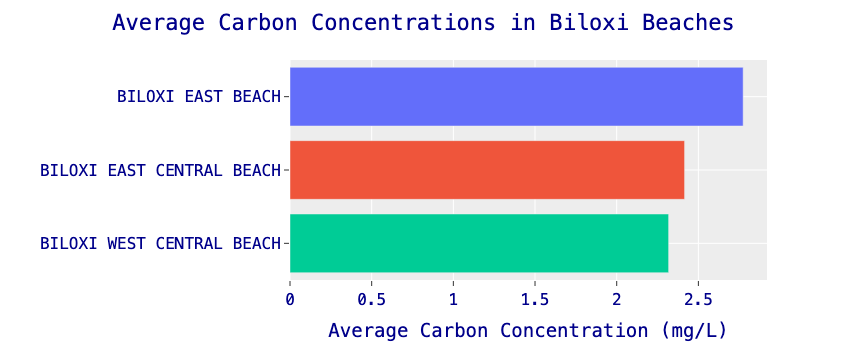

In [404]:
fig = px.bar(DFBiloxiPlot,
                 x='ResultMeasureValue_x',
             y = 'MonitoringLocationName_x',
                   color = 'MonitoringLocationName_x')

fig.update_layout(template="ggplot2",
                  title='Average Carbon Concentrations in Biloxi Beaches',
                  title_x=0.5,
                  yaxis={'categoryorder': 'category descending'},
                  xaxis_title="Average Carbon Concentration (mg/L)",
                  yaxis_title="",
                  showlegend = False,
                  font={'family':"Gravitas One, monospace",'size':16,'color':"Darkblue"},
                  autosize=True)
fig.show()

#### The three sites at Bixoli Beach have about the same carbon concentration, but the East beach is slightly higher than the East Central and West Central.

#### I did the same for Gulfport Beaches

In [329]:
GulfportMask = (DFplots['MonitoringLocationName_x'] == 'GULFPORT EAST BEACH') | (DFplots['MonitoringLocationName_x'] == 'GULFPORT CENTRAL BEACH') | (DFplots['MonitoringLocationName_x'] == 'GULFPORT HARBOR BEACH') | (DFplots['MonitoringLocationName_x'] == 'GULFPORT WEST BEACH')
DFGulfportPlot = DFplots[GulfportMask]
show(DFGulfportPlot)

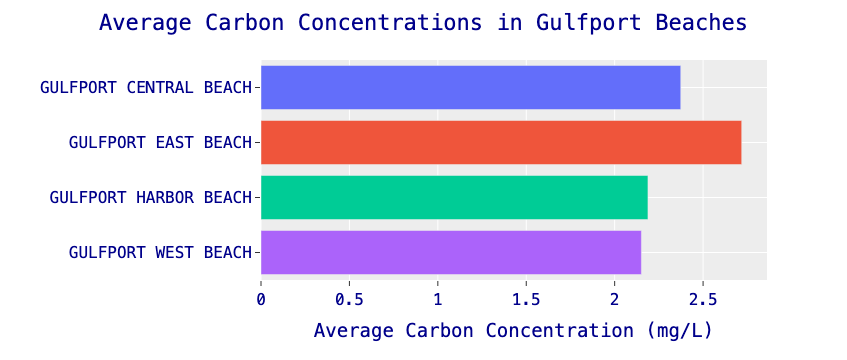

In [406]:
fig = px.bar(DFGulfportPlot,
                 x='ResultMeasureValue_x',
             y = 'MonitoringLocationName_x',
                   color = 'MonitoringLocationName_x')

fig.update_layout(template="ggplot2",
                  title='Average Carbon Concentrations in Gulfport Beaches',
                  title_x=0.5,
                  yaxis={'categoryorder': 'category descending'},
                  xaxis_title="Average Carbon Concentration (mg/L)",
                  yaxis_title="",
                  showlegend = False,
                  font={'family':"Gravitas One, monospace",'size':16,'color':"Darkblue"},
                  autosize=True)
fig.show()

#### The Gulfport Beaches are mostly the same in carbon concentration as well. Gulfport East Beach has a slightly higher concentration than the others.

#### I did the same with St. Joseph Bay.

In [337]:
StJosephMask = (DFplots['MonitoringLocationName_x'] == 'St. Joseph Bay 10') | (DFplots['MonitoringLocationName_x'] == 'St. Joseph Bay 11') | (DFplots['MonitoringLocationName_x'] == 'St. Joseph Bay 12') | (DFplots['MonitoringLocationName_x'] == 'St. Joseph Bay 13') | (DFplots['MonitoringLocationName_x'] == 'St. Joseph Bay 14') | (DFplot1['MonitoringLocationName_x'] == 'St. Joseph Bay 7')
DFStJosephPlot = DFplots[StJosephMask]
show(DFStJosephPlot)

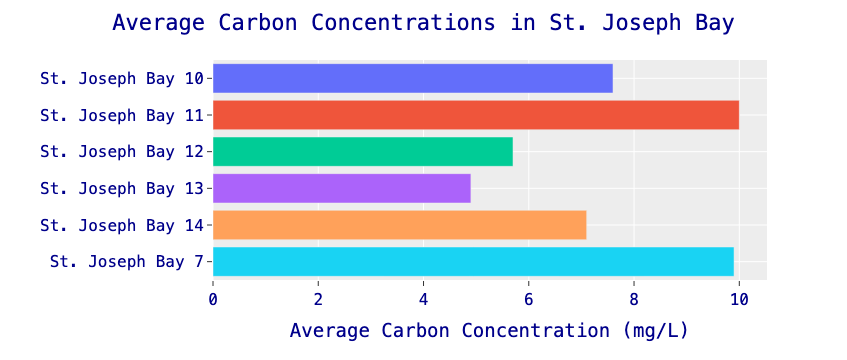

In [408]:
fig = px.bar(DFStJosephPlot,
                 x='ResultMeasureValue_x',
             y = 'MonitoringLocationName_x',
                   color = 'MonitoringLocationName_x')

fig.update_layout(template="ggplot2",
                  title='Average Carbon Concentrations in St. Joseph Bay',
                  title_x=0.5,
                  yaxis={'categoryorder': 'category descending'},
                  xaxis_title="Average Carbon Concentration (mg/L)",
                  yaxis_title="",
                  showlegend = False,
                  font={'family':"Gravitas One, monospace",'size':16,'color':"Darkblue"},
                  autosize=True)
fig.show()

#### There are some noticeable variations in the concentration levels here. Bay 11 and Bay 7 have the highest carbon concentrations, and Bay 13 is the least concentrated.

#### Finally, I combined all three of these graphs into a single bar graph

In [348]:
CombinedMask = (DFplots['MonitoringLocationName_x'] == 'St. Joseph Bay 10') | (DFplots['MonitoringLocationName_x'] == 'St. Joseph Bay 11') | (DFplots['MonitoringLocationName_x'] == 'St. Joseph Bay 12') | (DFplots['MonitoringLocationName_x'] == 'St. Joseph Bay 13') | (DFplots['MonitoringLocationName_x'] == 'St. Joseph Bay 14') | (DFplot1['MonitoringLocationName_x'] == 'St. Joseph Bay 7') | (DFplots['MonitoringLocationName_x'] == 'GULFPORT EAST BEACH') | (DFplots['MonitoringLocationName_x'] == 'GULFPORT CENTRAL BEACH') | (DFplots['MonitoringLocationName_x'] == 'GULFPORT HARBOR BEACH') | (DFplots['MonitoringLocationName_x'] == 'GULFPORT WEST BEACH') | (DFplots['MonitoringLocationName_x'] == 'BILOXI EAST CENTRAL BEACH') | (DFplots['MonitoringLocationName_x'] == 'BILOXI WEST CENTRAL BEACH') | (DFplots['MonitoringLocationName_x'] == 'BILOXI EAST BEACH') 
DFCombined = DFplots[CombinedMask]
show(DFCombined)

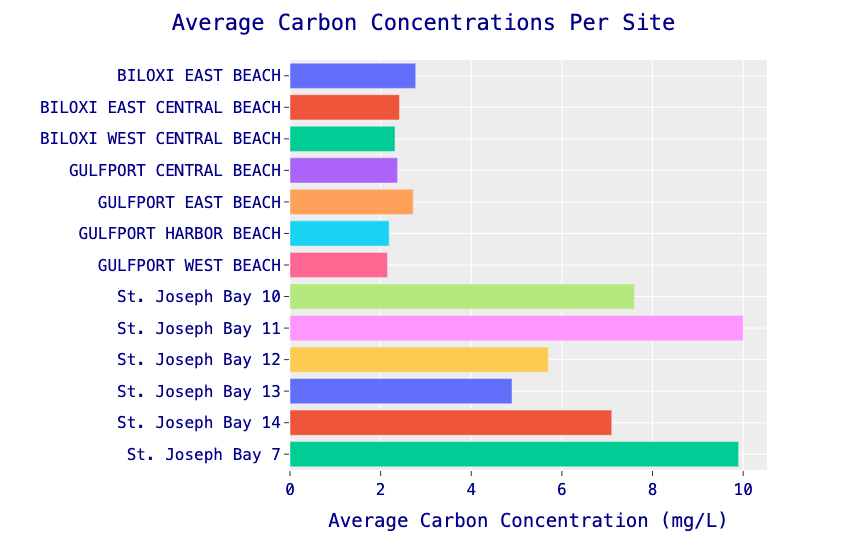

In [387]:
fig = px.bar(DFCombined,
                 x='ResultMeasureValue_x',
             y = 'MonitoringLocationName_x',
                   color = 'MonitoringLocationName_x')

fig.update_layout(template="ggplot2",
                  title='Average Carbon Concentrations Per Site',
                  title_x=0.5,
                  yaxis={'categoryorder': 'category descending'},
                  xaxis_title="Average Carbon Concentration (mg/L)",
                  yaxis_title="",
                  showlegend = False,
                  font={'family':"Gravitas One, monospace",'size':16,'color':"Darkblue"},
                  autosize=False,
                  width=1000,
                  height=550)
fig.show()

#### After combining all of them, it is apparent that St. Joseph Bay has a much higher carbon concentration than the other sites.

# Proposal for further study

### What larger questions would you like to try to answer?

I could continue this analysis for all the other beaches that are included in the data, and see if the location of the beach/site has an effect on the carbon concentration. Location could have an impact, especially if the site is located in a heavily populated area, if there's certain businesses nearby, the frequency of boats in the area, etc. If possible, I'd also like to analyze other chemicals besides carbon. To deepen my understanding of the data, it would be useful to also do a little research on how certain chemicals have an effect on ocean water, and the normal/expected concentrations vs. concerning concentrations.

I could also further analyze why might some sites, even if they are located in the same beach, higher in carbon concentration than others. For examples, what makes St. Joseph Bay different from Gulfport and Biloxi? Why are there differences between sites within St. Joseph Bay? Although the carbon concentrations within the sites of Gulfport/Biloxi are similar, are the slight differences significant in any way?

### What predictive analysis do you think might be possible?

Using latitude and/or longitude might allow us to predict concentrations of certain chemicals. 

### Are there any larger impacts that your study might have?

This study could reveal patterns and possible reasons why certain chemicals are more abundant in some beaches than in others. Depending on these reasons, it could raise awareness of the chemical composition of our oceans, and how this could possibly impact human society.

# I plan to work with Seth Chairez